<a href="https://colab.research.google.com/github/monjar/AI-Assignments/blob/master/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from tensorflow.keras.datasets import fashion_mnist
from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout
from keras.layers import ELU, PReLU, LeakyReLU
from keras.optimizers import Adam
from keras import initializers

os.environ["KERAS_BACKEND"] = "tensorflow"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

np.random.seed(10)

random_dim = 200

In [ ]:
def load_mnist_fashion():
  (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

  x_train = (x_train.astype(np.float32) - 127.5) / 127.5
  x_train = x_train.reshape(60000, 784)
  return (x_train, y_train, x_test, y_test)

In [ ]:
def get_generator(optimizer):
  generator = Sequential()

  generator.add(Dense(256,
                      input_dim=random_dim,
                      kernel_initializer=initializers.RandomNormal(stddev=0.02)))
  generator.add(LeakyReLU(0.2))

  
  generator.add(Dense(512))
  generator.add(LeakyReLU(0.2))
  
  generator.add(Dense(1024))
  generator.add(LeakyReLU(0.2))

  
  generator.add(Dense(784, activation='tanh'))

  generator.compile(loss='binary_crossentropy', optimizer=optimizer)
  return generator

In [ ]:
def get_discriminator(optimizer):
  discriminator = Sequential()
  discriminator.add(Dense(1024,
                      input_dim=784,
                      kernel_initializer=initializers.RandomNormal(stddev=0.02)))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.3))

  discriminator.add(Dense(512))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.3))


  discriminator.add(Dense(256))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.3))

  
  discriminator.add(Dense(1, activation='sigmoid'))
  discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
  return discriminator



In [ ]:
def get_gan(discriminator, random_dim, generator, optimizer):
  discriminator.trainable = False
  gan_input = Input(shape=(random_dim,))

  x = generator(gan_input)

  gan_output = discriminator(x)

  gan = Model(inputs = gan_input, outputs = gan_output)

  gan.compile(loss='binary_crossentropy', optimizer=optimizer)
  
  return gan

In [ ]:
def plot_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
  noise = np.random.normal(0, 1, size=[examples, random_dim])
  generated_images = generator.predict(noise)
  generated_images = generated_images.reshape(examples, 28, 28)

  plt.figure(figsize=figsize)
  for i in range(generated_images.shape[0]):
    plt.subplot(dim[0], dim[1], i+1)
    plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
    plt.axis('off')
  plt.tight_layout()
  plt.savefig(f'gan_generated_image_epoch_{epoch}.png')



In [ ]:
def train(epochs = 1, batch_size=512):
  x_train, y_train, x_test, y_test = load_mnist_fashion()

  batch_count = x_train.shape[0] / batch_size

  adam = Adam(lr=0.002, beta_1=0.5)
  generator = get_generator(adam)
  discriminator = get_discriminator(adam)
  gan = get_gan(discriminator, random_dim, generator, adam)
  for e in range(1, epochs + 1):
    print(f"{'-'*15} Epoch {e} {'-'*15} ")
    for tq in tqdm(range(int(batch_count))):
      noise = np.random.normal(0, 1, size=[batch_size, random_dim])
      image_batch = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]

      generated_images = generator.predict(noise,verbose=0)
      x = np.concatenate([image_batch, generated_images])

      y_dis = np.zeros(2 * batch_size)
      y_dis[:batch_size] = 0.9

      discriminator.trainable = True
      discriminator.train_on_batch(x,y_dis)

      noise = np.random.normal(0, 1, size=[batch_size, random_dim])
      y_gen = np.ones(batch_size)
      discriminator.trainable = False
      gan.train_on_batch(noise, y_gen)

    if e == 1 or e % 2 == 0:
      plot_images(e, generator)

--------------- Epoch 1 --------------- 


  0%|          | 0/117 [00:00<?, ?it/s]

4/4 [==============================] - 0s 7ms/step
--------------- Epoch 2 --------------- 


  0%|          | 0/117 [00:00<?, ?it/s]

4/4 [==============================] - 0s 6ms/step
--------------- Epoch 3 --------------- 


  0%|          | 0/117 [00:00<?, ?it/s]

--------------- Epoch 4 --------------- 


  0%|          | 0/117 [00:00<?, ?it/s]

4/4 [==============================] - 0s 6ms/step
--------------- Epoch 5 --------------- 


  0%|          | 0/117 [00:00<?, ?it/s]

--------------- Epoch 6 --------------- 


  0%|          | 0/117 [00:00<?, ?it/s]

4/4 [==============================] - 0s 6ms/step
--------------- Epoch 7 --------------- 


  0%|          | 0/117 [00:00<?, ?it/s]

--------------- Epoch 8 --------------- 


  0%|          | 0/117 [00:00<?, ?it/s]

4/4 [==============================] - 0s 6ms/step
--------------- Epoch 9 --------------- 


  0%|          | 0/117 [00:00<?, ?it/s]

--------------- Epoch 10 --------------- 


  0%|          | 0/117 [00:00<?, ?it/s]

4/4 [==============================] - 0s 8ms/step


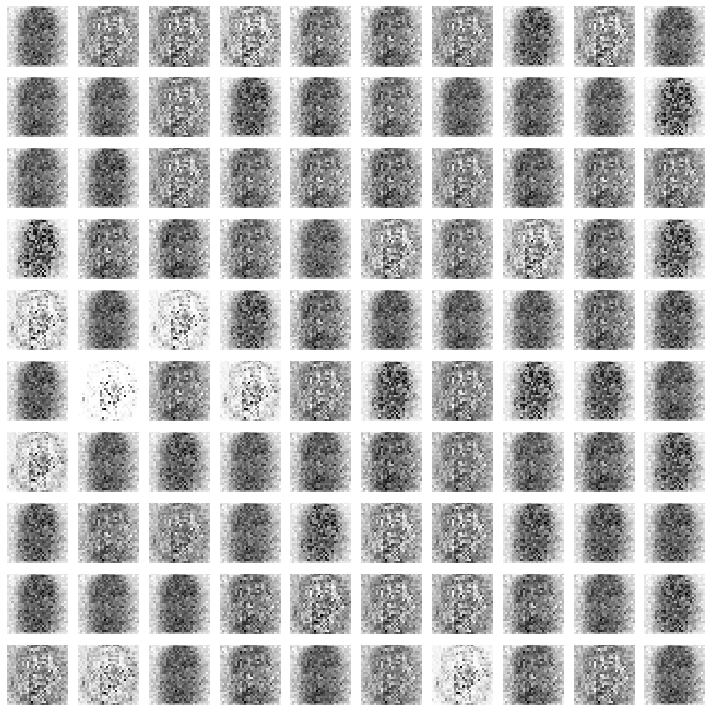

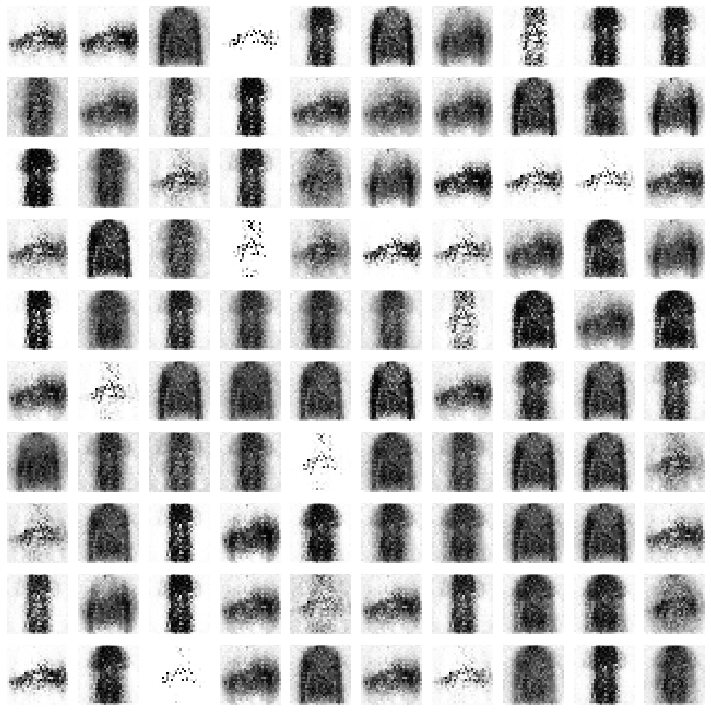

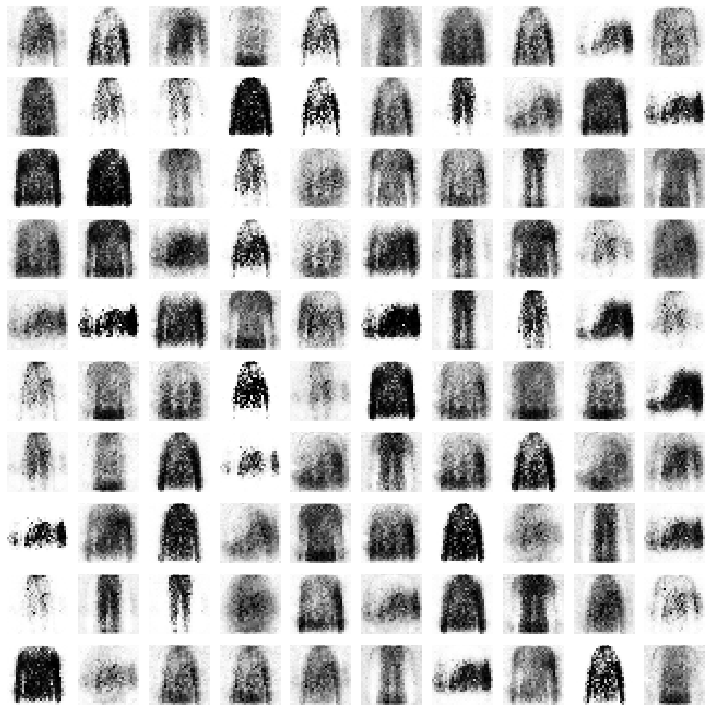

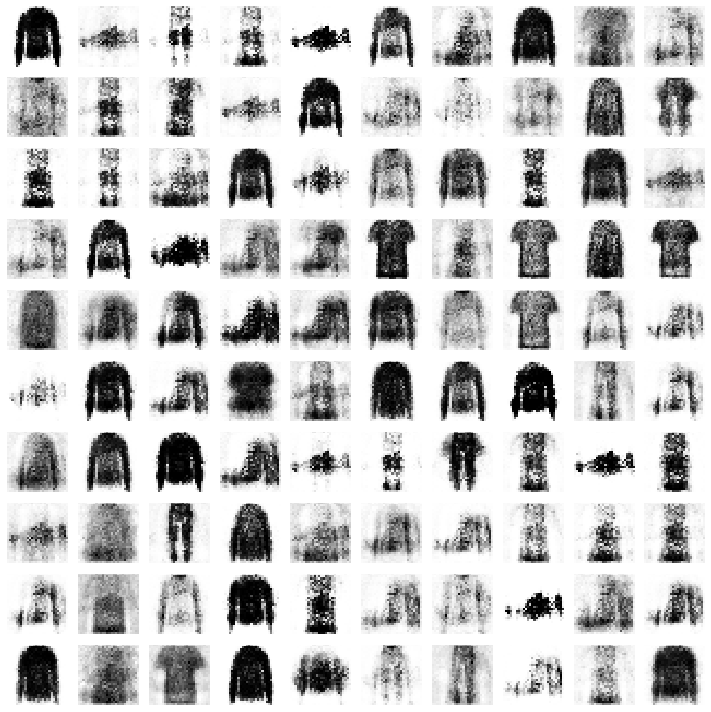

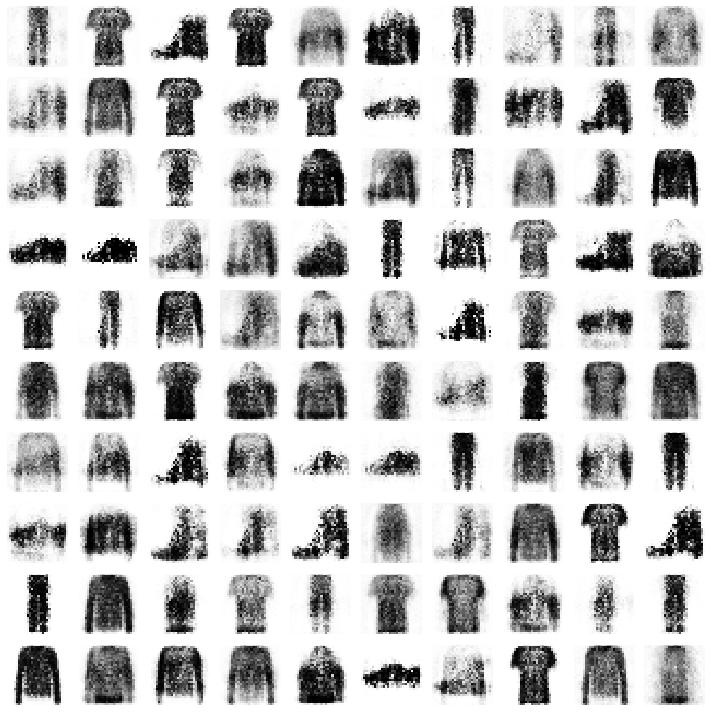

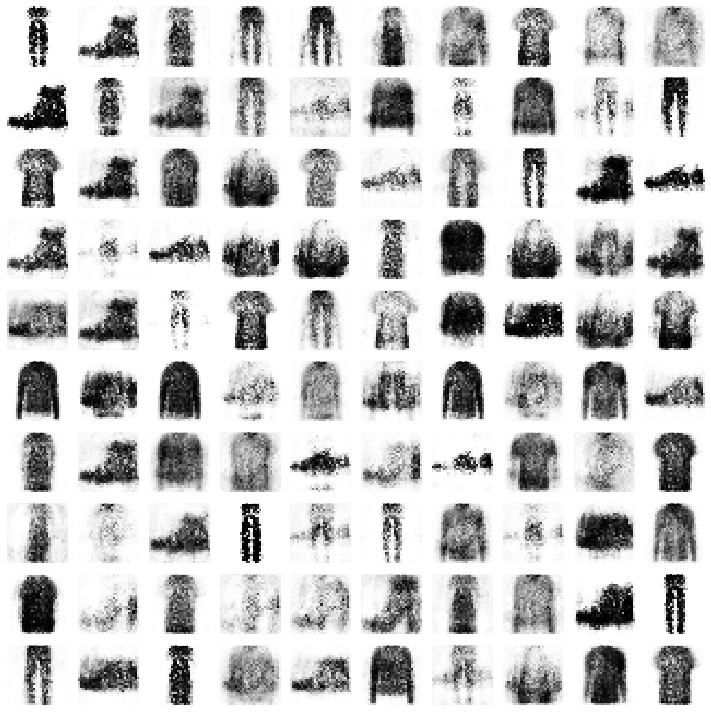

In [ ]:
train(10)